  # **CE256 Project Code**
  ## Fall 2024

In [3]:
# Pip Install
!pip install --upgrade pip
!pip install transformers
!pip install tensorflow
!pip install tf-keras

#Import
import re
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import transformers

#Distillbert
from transformers import pipeline
model_checkpoint = "distilbert/distilbert-base-uncased-finetuned-sst-2-english"
sentiment_analysis = pipeline("sentiment-analysis", model=model_checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [23]:
from collections import Counter
import string

def most_common_words(titles, num_words=20):
  all_text = " ".join(titles)
  translator = str.maketrans('', '', string.punctuation)
  cleaned_text = all_text.translate(translator).lower()
  words = cleaned_text.split()
  stopwords = set([
        "the", "and", "is", "to", "in", "of", "for", "on", "a", "with",
        "by", "at", "an", "as", "it", "from", "this", "that", "be", "or"
    ])
  filtered_words = [word for word in words if word not in stopwords]
  word_counts = Counter(filtered_words)
  return word_counts.most_common(num_words)

## BART Analysis

In [5]:
# Importing BART data
BART_df = pd.read_csv('BART_News.csv')
BART_df[['dates', 'time','timezone']]=BART_df['date'].str.split(",", expand=True)
BART_df[['month','day','year']]=BART_df['dates'].str.split("/", expand=True)
BART_df['temp']=BART_df['title'].astype(str).map(sentiment_analysis).map(str)
BART_df['temp2'] = BART_df['temp'].str.findall(r'NEGATIVE|POSITIVE').str[0].replace('NEGATIVE',-1).replace('POSITIVE',1)
BART_df['sentence_sentiment'] = BART_df['temp'].str.findall(r'0\.\d+').str[0]
BART_df['sentence_sentiment'] = (BART_df['temp2']*BART_df['sentence_sentiment'].astype(float))
BART_df=BART_df.drop(['temp','temp2'], axis='columns')

<ipython-input-5-093ebb7a3d55>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  BART_df['temp2'] = BART_df['temp'].str.findall(r'NEGATIVE|POSITIVE').str[0].replace('NEGATIVE',-1).replace('POSITIVE',1)


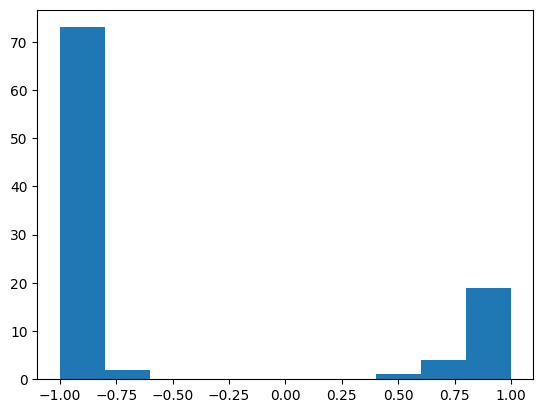

In [6]:
plt.hist(BART_df['sentence_sentiment'])
plt.show()

In [24]:
BART_common_words=most_common_words(BART_df['title'])
BART_common_words

[('bart', 93),
 ('san', 17),
 ('stabbing', 16),
 ('station', 13),
 ('francisco', 13),
 ('suspect', 12),
 ('train', 10),
 ('man', 9),
 ('attempted', 9),
 ('murder', 9),
 ('embarcadero', 8),
 ('sf', 8),
 ('bay', 7),
 ('area', 7),
 ('obituary', 7),
 ('slashing', 6),
 ('police', 6),
 ('2024', 6),
 ('chp', 5),
 ('street', 5)]

## MUNI Analysis

In [7]:
MUNI_df = pd.read_csv('MUNI_News.csv')
MUNI_df[['dates', 'time','timezone']]=MUNI_df['date'].str.split(",", expand=True)
MUNI_df[['month','day','year']]=MUNI_df['dates'].str.split("/", expand=True)
MUNI_df['temp']=MUNI_df['title'].astype(str).map(sentiment_analysis).map(str)
MUNI_df['temp2'] = MUNI_df['temp'].str.findall(r'NEGATIVE|POSITIVE').str[0].replace('NEGATIVE',-1).replace('POSITIVE',1)
MUNI_df['sentence_sentiment'] = MUNI_df['temp'].str.findall(r'0\.\d+').str[0]
MUNI_df['sentence_sentiment'] = (MUNI_df['temp2']*MUNI_df['sentence_sentiment'].astype(float))
MUNI_df=MUNI_df.drop(['temp','temp2'], axis='columns')

<ipython-input-7-fc341776c9d5>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  MUNI_df['temp2'] = MUNI_df['temp'].str.findall(r'NEGATIVE|POSITIVE').str[0].replace('NEGATIVE',-1).replace('POSITIVE',1)


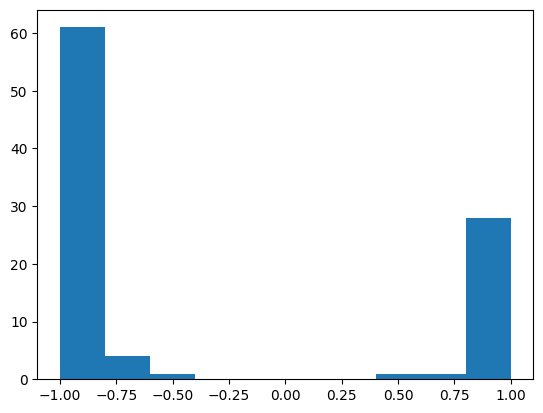

In [8]:
plt.hist(MUNI_df['sentence_sentiment'])
plt.show()

In [26]:
MUNI_common_words=most_common_words(MUNI_df['title'])
MUNI_common_words

[('muni', 74),
 ('san', 11),
 ('bonds', 10),
 ('tax', 9),
 ('municipal', 9),
 ('francisco', 8),
 ('sf', 8),
 ('trump', 7),
 ('long', 7),
 ('market', 7),
 ('victory', 6),
 ('bond', 6),
 ('threatens', 5),
 ('transit', 5),
 ('million', 5),
 ('floppy', 5),
 ('disks', 5),
 ('measure', 5),
 ('after', 5),
 ('key', 4)]

## AC Transit Analysis

In [9]:
AC_Transit_df = pd.read_csv('AC_Transit_News.csv')
AC_Transit_df[['dates', 'time','timezone']]=AC_Transit_df['date'].str.split(",", expand=True)
AC_Transit_df[['month','day','year']]=AC_Transit_df['dates'].str.split("/", expand=True)
AC_Transit_df['temp']=AC_Transit_df['title'].astype(str).map(sentiment_analysis).map(str)
AC_Transit_df['temp2'] = AC_Transit_df['temp'].str.findall(r'NEGATIVE|POSITIVE').str[0].replace('NEGATIVE',-1).replace('POSITIVE',1)
AC_Transit_df['sentence_sentiment'] = AC_Transit_df['temp'].str.findall(r'0\.\d+').str[0]
AC_Transit_df['sentence_sentiment'] = (AC_Transit_df['temp2']*AC_Transit_df['sentence_sentiment'].astype(float))
AC_Transit_df=AC_Transit_df.drop(['temp','temp2'], axis='columns')

<ipython-input-9-09f3e8cbb6ba>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  AC_Transit_df['temp2'] = AC_Transit_df['temp'].str.findall(r'NEGATIVE|POSITIVE').str[0].replace('NEGATIVE',-1).replace('POSITIVE',1)


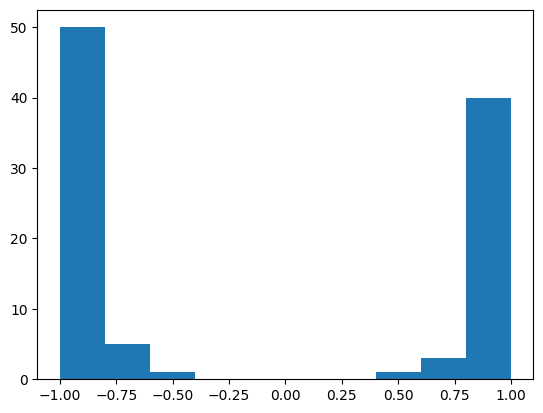

In [10]:
plt.hist(AC_Transit_df['sentence_sentiment'])
plt.show()

In [25]:
AC_Transit_common_words=most_common_words(AC_Transit_df['title'])
AC_Transit_common_words

[('transit', 68),
 ('ac', 60),
 ('bus', 45),
 ('oakland', 15),
 ('2024', 13),
 ('month', 12),
 ('employees', 11),
 ('changes', 10),
 ('cameras', 10),
 ('after', 8),
 ('automated', 7),
 ('camera', 7),
 ('bay', 7),
 ('service', 6),
 ('board', 6),
 ('lines', 6),
 ('enforcement', 6),
 ('parked', 6),
 ('new', 5),
 ('illegally', 5)]

# Caltrain Analysis

In [27]:
Caltrain_df = pd.read_csv('AC_Transit_News.csv')
Caltrain_df[['dates', 'time','timezone']]=Caltrain_df['date'].str.split(",", expand=True)
Caltrain_df[['month','day','year']]=Caltrain_df['dates'].str.split("/", expand=True)
Caltrain_df['temp']=Caltrain_df['title'].astype(str).map(sentiment_analysis).map(str)
Caltrain_df['temp2'] = Caltrain_df['temp'].str.findall(r'NEGATIVE|POSITIVE').str[0].replace('NEGATIVE',-1).replace('POSITIVE',1)
Caltrain_df['sentence_sentiment'] = Caltrain_df['temp'].str.findall(r'0\.\d+').str[0]
Caltrain_df['sentence_sentiment'] = (Caltrain_df['temp2']*Caltrain_df['sentence_sentiment'].astype(float))
Caltrain_df=Caltrain_df.drop(['temp','temp2'], axis='columns')

<ipython-input-27-9c81631242f2>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Caltrain_df['temp2'] = Caltrain_df['temp'].str.findall(r'NEGATIVE|POSITIVE').str[0].replace('NEGATIVE',-1).replace('POSITIVE',1)


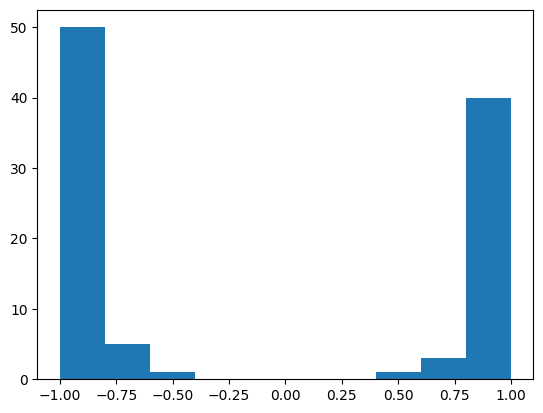

In [28]:
plt.hist(Caltrain_df['sentence_sentiment'])
plt.show()

In [29]:
Caltrain_common_words=most_common_words(Caltrain_df['title'])
Caltrain_common_words

[('transit', 68),
 ('ac', 60),
 ('bus', 45),
 ('oakland', 15),
 ('2024', 13),
 ('month', 12),
 ('employees', 11),
 ('changes', 10),
 ('cameras', 10),
 ('after', 8),
 ('automated', 7),
 ('camera', 7),
 ('bay', 7),
 ('service', 6),
 ('board', 6),
 ('lines', 6),
 ('enforcement', 6),
 ('parked', 6),
 ('new', 5),
 ('illegally', 5)]